<a href="https://colab.research.google.com/github/hahmed988/Machine-Learning/blob/master/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def analyze_seasonality(df):
    """
    Analyze each column in the dataframe for seasonality.

    Parameters:
    df (pandas.DataFrame): Input dataframe.

    Returns:
    pandas.DataFrame: Dataframe with column name, seasonality, and is_seasonal flag.
    """
    results = []
    for col in df.columns:
        # Perform Augmented Dickey-Fuller test
        result = adfuller(df[col])
        p_value = result[1]

        # Determine if the series is seasonal based on the p-value
        is_seasonal = p_value < 0.05

        # Calculate the seasonality using the autocorrelation function (ACF) plot
        seasonality = calculate_seasonality(df[col])

        results.append({
            'column_name': col,
            'seasonality': seasonality,
            'is_seasonal': is_seasonal
        })

    return pd.DataFrame(results)

def calculate_seasonality(series):
    """
    Calculate the seasonality of a time series using the autocorrelation function (ACF) plot.

    Parameters:
    series (pandas.Series): Input time series.

    Returns:
    float: Seasonality value.
    """
    # Calculate the autocorrelation coefficients
    acf_coeffs = np.correlate(series, series, mode='full')[len(series)-1:]

    # Calculate the seasonality value
    seasonality = np.max(acf_coeffs[1:])  # Ignore the first coefficient (autocorrelation at lag 0)

    return seasonality

In [ ]:

# Create a sample dataframe
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')
seasonal_data = np.sin(np.arange(len(date_range))) + np.random.normal(0, 0.5, len(date_range))
trend_data = np.arange(len(date_range)) + np.random.normal(0, 10, len(date_range))
random_data = np.random.normal(0, 1, len(date_range))


df = pd.DataFrame({
    'Seasonal': seasonal_data,
    'Trend': trend_data,
    'Random': random_data
}, index=date_range)

<ipython-input-4-3338e1a74837>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')


In [ ]:
df.head()

,Seasonal,Trend,Random
2022-01-31,0.882026,7.610377,2.269755
2022-02-28,1.041550,2.216750,-1.454366
2022-03-31,1.398666,6.438632,0.045759
2022-04-30,1.261567,6.336743,-0.187184
2022-05-31,0.176976,18.940791,1.532779


In [ ]:
# Test the function
results_df = analyze_seasonality(df)
print(results_df)

  column_name  seasonality  is_seasonal
0    Seasonal     4.899053        False
1       Trend   415.341659         True
2      Random     2.363635         True


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt

def analyze_seasonality(df):
    """
    Analyze each column in the dataframe for seasonality.

    Parameters:
    df (pandas.DataFrame): Input dataframe.

    Returns:
    dict: Dictionary with column name as key and a list of seasonal lags as value.
    """
    results = {}
    for col in df.columns:
        # Calculate the autocorrelation function (ACF) coefficients
        acf_coeffs = acf(df[col], nlags=len(df[col])//2)

        # Identify the seasonal lags
        seasonal_lags = []
        for i, coeff in enumerate(acf_coeffs):
            if i > 0 and abs(coeff) > 0.5:  # Consider a lag as seasonal if the ACF coefficient is greater than 0.5
                seasonal_lags.append(i)

        results[col] = seasonal_lags

    return results

# Create a sample dataframe
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')
seasonal_data = np.sin(np.arange(len(date_range))) + np.random.normal(0, 0.5, len(date_range))
trend_data = np.arange(len(date_range)) + np.random.normal(0, 10, len(date_range))
random_data = np.random.normal(0, 1, len(date_range))

df = pd.DataFrame({
    'Seasonal': seasonal_data,
    'Trend': trend_data,
    'Random': random_data
}, index=date_range)

# Test the function
results = analyze_seasonality(df)
for col, seasonal_lags in results.items():
    print(f"Column: {col}")
    print(f"Seasonal Lags: {seasonal_lags}")
    print()

Column: Seasonal
Seasonal Lags: []

Column: Trend
Seasonal Lags: []

Column: Random
Seasonal Lags: []



<ipython-input-7-486136d7651d>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')


Column: Weekly Seasonal
Seasonal Lags: [3, 4, 7, 10, 11, 14, 17, 18, 21, 24, 25, 28, 31, 32, 35, 38, 39, 42, 45, 46, 49, 52, 53, 56, 59, 60, 63, 66, 67, 70, 73, 74, 77, 84, 88, 91, 98, 105, 112]

Column: Monthly Seasonal
Seasonal Lags: [1, 2, 3, 12, 13, 14, 15, 16, 17, 18, 28, 29, 30, 31, 32, 43, 44, 45, 46, 47, 58, 59, 60, 61, 62, 75, 90]

Column: Random
Seasonal Lags: []



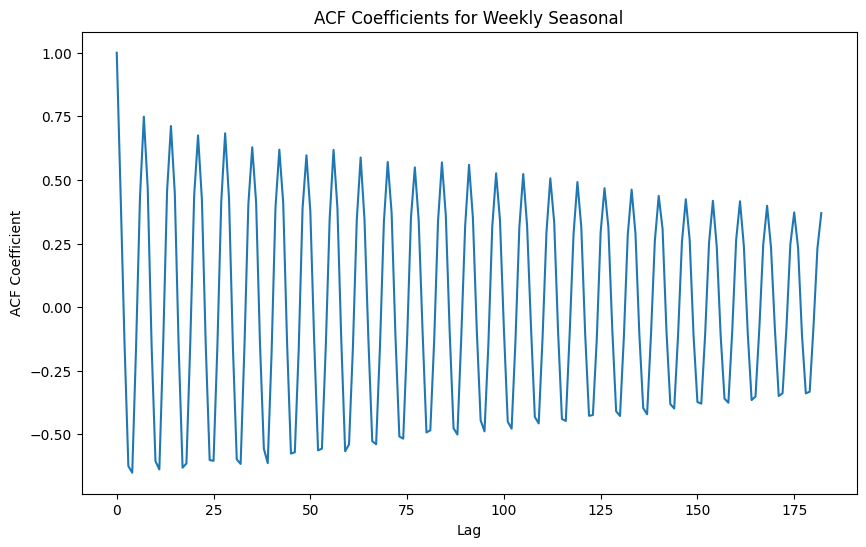

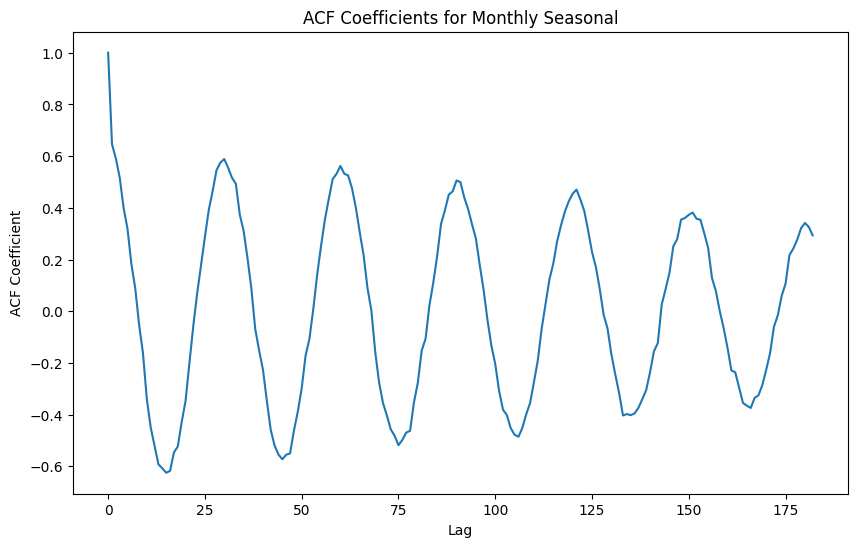

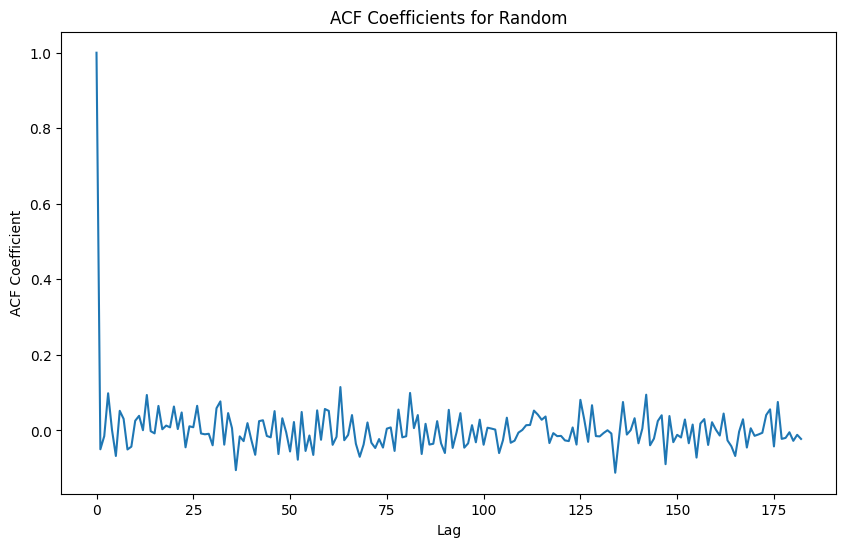

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt

def analyze_seasonality(df):
    """
    Analyze each column in the dataframe for seasonality.

    Parameters:
    df (pandas.DataFrame): Input dataframe.

    Returns:
    dict: Dictionary with column name as key and a list of seasonal lags as value.
    """
    results = {}
    for col in df.columns:
        # Calculate the autocorrelation function (ACF) coefficients
        acf_coeffs = acf(df[col], nlags=len(df[col])//2)

        # Identify the seasonal lags
        seasonal_lags = []
        for i, coeff in enumerate(acf_coeffs):
            if i > 0 and abs(coeff) > 0.5:  # Consider a lag as seasonal if the ACF coefficient is greater than 0.5
                seasonal_lags.append(i)

        results[col] = seasonal_lags

    return results

# Create a sample dataframe with periodic seasonality
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
seasonal_data = np.sin(2 * np.pi * np.arange(len(date_range)) / 7) + np.random.normal(0, 0.5, len(date_range))  # Weekly seasonality
seasonal_data_2 = np.sin(2 * np.pi * np.arange(len(date_range)) / 30) + np.random.normal(0, 0.5, len(date_range))  # Monthly seasonality
random_data = np.random.normal(0, 1, len(date_range))

df = pd.DataFrame({
    'Weekly Seasonal': seasonal_data,
    'Monthly Seasonal': seasonal_data_2,
    'Random': random_data
}, index=date_range)

# Test the function
results = analyze_seasonality(df)
for col, seasonal_lags in results.items():
    print(f"Column: {col}")
    print(f"Seasonal Lags: {seasonal_lags}")
    print()

# Plot the ACF coefficients for each column
for col in df.columns:
    acf_coeffs = acf(df[col], nlags=len(df[col])//2)
    plt.figure(figsize=(10, 6))
    plt.plot(acf_coeffs)
    plt.title(f"ACF Coefficients for {col}")
    plt.xlabel("Lag")
    plt.ylabel("ACF Coefficient")
    plt.show()

Column: Weekly Seasonal
Seasonal Lags: [3, 18, 21, 24, 39, 42, 45, 60, 63, 66, 84, 105]

Column: Monthly Seasonal
Seasonal Lags: [1, 2, 3, 12, 13, 14, 15, 16, 17, 18, 28, 29, 30, 31, 32, 43, 44, 45, 46, 47, 58, 59, 60, 61, 62, 75, 90]

Column: Random
Seasonal Lags: []



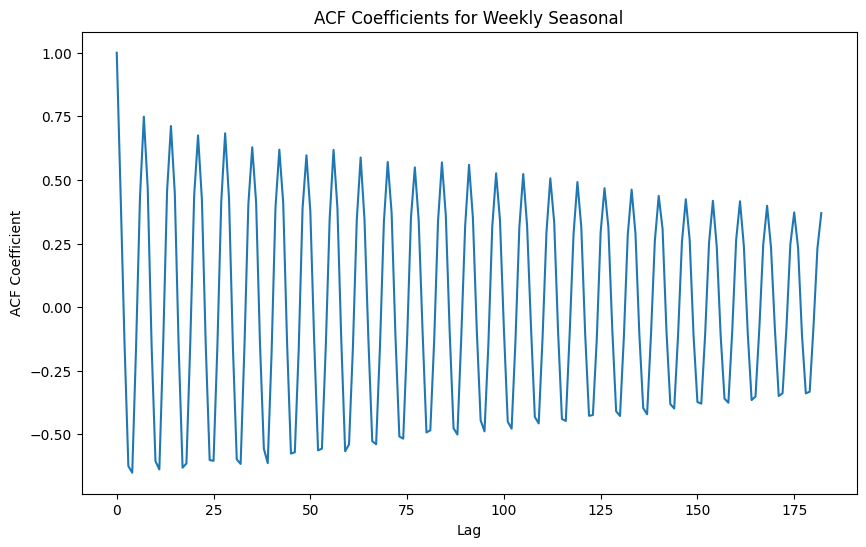

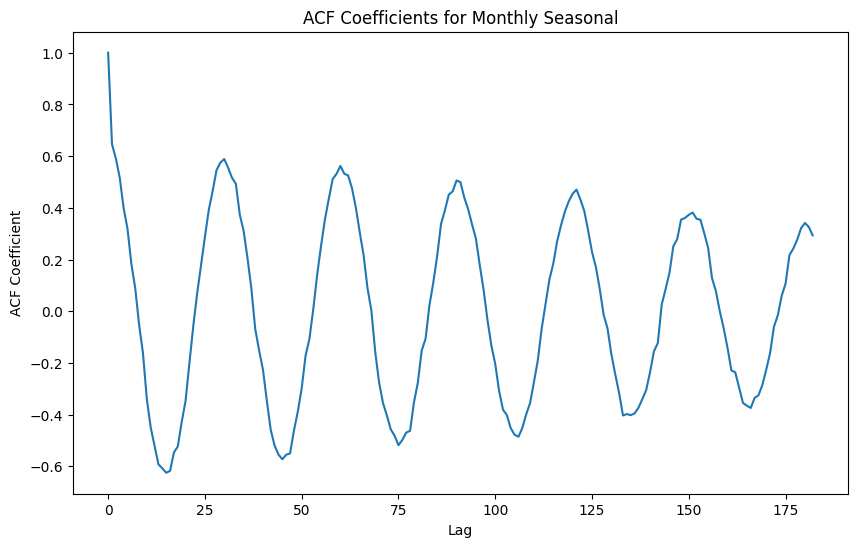

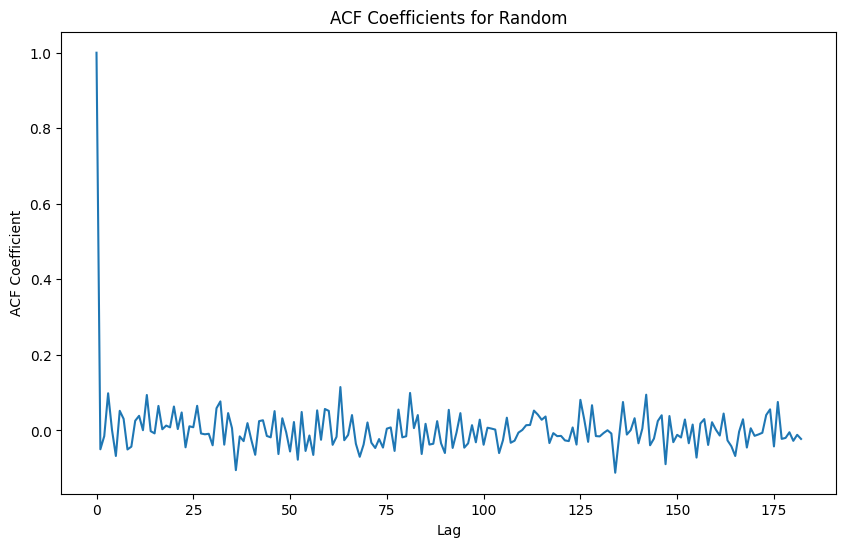

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt

def analyze_seasonality(df):
    """
    Analyze each column in the dataframe for seasonality.

    Parameters:
    df (pandas.DataFrame): Input dataframe.

    Returns:
    dict: Dictionary with column name as key and a list of seasonal lags as value.
    """
    results = {}
    for col in df.columns:
        # Calculate the autocorrelation function (ACF) coefficients
        acf_coeffs = acf(df[col], nlags=len(df[col])//2)

        # Identify the seasonal lags
        seasonal_lags = []
        for i, coeff in enumerate(acf_coeffs):
            if i > 0 and abs(coeff) > 0.5 and i < len(acf_coeffs) // 2:  # Consider a lag as seasonal if the ACF coefficient is greater than 0.5
                seasonal_lags.append(i)

        # Find the first seasonal lag
        first_seasonal_lag = None
        for i, coeff in enumerate(acf_coeffs):
            if i > 0 and abs(coeff) > 0.5 and i < len(acf_coeffs) // 2:
                first_seasonal_lag = i
                break

        # Find other seasonal lags that are multiples of the first seasonal lag
        if first_seasonal_lag is not None:
            seasonal_lags = [i for i, coeff in enumerate(acf_coeffs) if i > 0 and abs(coeff) > 0.5 and i % first_seasonal_lag == 0]

        results[col] = seasonal_lags

    return results

# Create a sample dataframe with periodic seasonality
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
seasonal_data = np.sin(2 * np.pi * np.arange(len(date_range)) / 7) + np.random.normal(0, 0.5, len(date_range))  # Weekly seasonality
seasonal_data_2 = np.sin(2 * np.pi * np.arange(len(date_range)) / 30) + np.random.normal(0, 0.5, len(date_range))  # Monthly seasonality
random_data = np.random.normal(0, 1, len(date_range))

df = pd.DataFrame({
    'Weekly Seasonal': seasonal_data,
    'Monthly Seasonal': seasonal_data_2,
    'Random': random_data
}, index=date_range)

# Test the function
results = analyze_seasonality(df)
for col, seasonal_lags in results.items():
    print(f"Column: {col}")
    print(f"Seasonal Lags: {seasonal_lags}")
    print()

# Plot the ACF coefficients for each column
for col in df.columns:
    acf_coeffs = acf(df[col], nlags=len(df[col])//2)
    plt.figure(figsize=(10, 6))
    plt.plot(acf_coeffs)
    plt.title(f"ACF Coefficients for {col}")
    plt.xlabel("Lag")
    plt.ylabel("ACF Coefficient")
    plt.show()

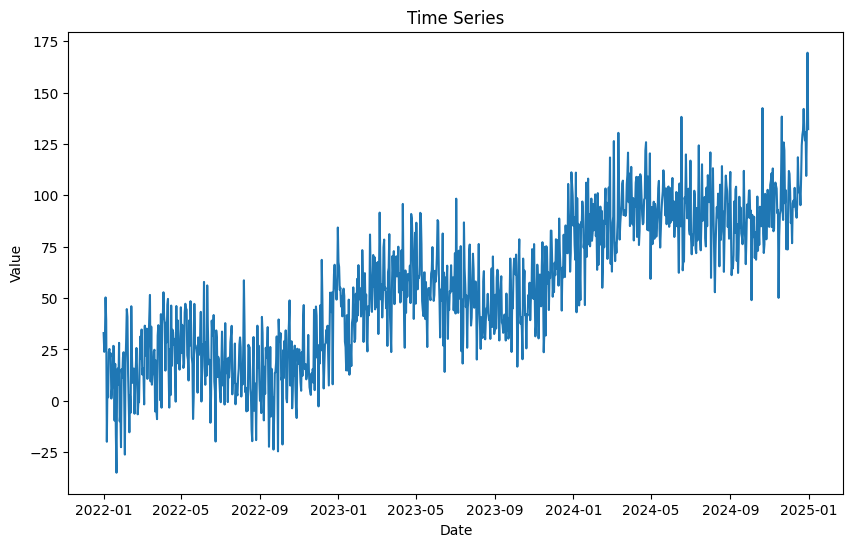

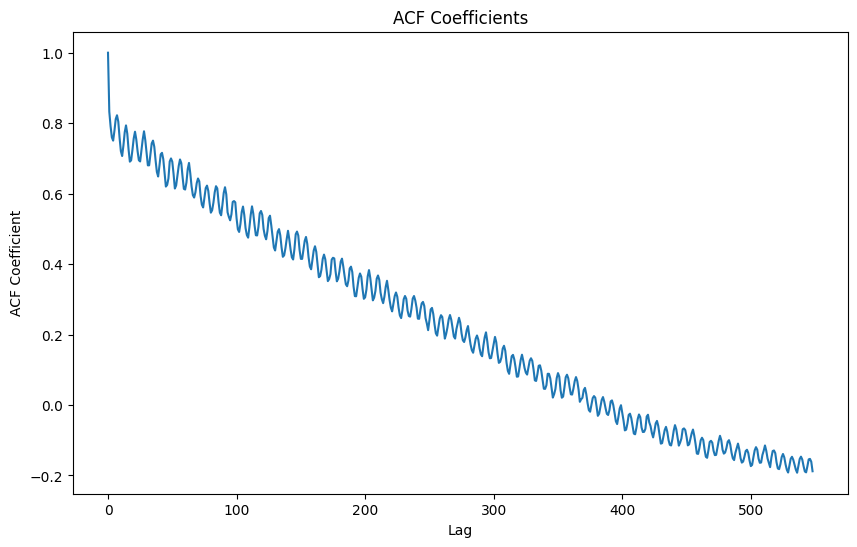

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf
import matplotlib.pyplot as plt

# Create a sample dataframe with periodic seasonality
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')

# Create a trend component
trend = np.arange(len(date_range)) * 0.1 + np.random.normal(0, 10, len(date_range))

# Create a seasonal component (weekly and monthly)
seasonal_weekly = np.sin(2 * np.pi * np.arange(len(date_range)) / 7) * 10 + np.random.normal(0, 2, len(date_range))
seasonal_monthly = np.sin(2 * np.pi * np.arange(len(date_range)) / 30) * 5 + np.random.normal(0, 1, len(date_range))

# Create a holiday component (Christmas and New Year's)
holiday_christmas = np.where((date_range.month == 12) & (date_range.day >= 20), 20, 0) + np.random.normal(0, 5, len(date_range))
holiday_new_year = np.where((date_range.month == 1) & (date_range.day <= 5), 15, 0) + np.random.normal(0, 3, len(date_range))

# Create a weather component (temperature and precipitation)
weather_temperature = np.sin(2 * np.pi * np.arange(len(date_range)) / 365) * 10 + np.random.normal(0, 5, len(date_range))
weather_precipitation = np.sin(2 * np.pi * np.arange(len(date_range)) / 365) * 5 + np.random.normal(0, 2, len(date_range))

# Combine all components to create the final time series
time_series = trend + seasonal_weekly + seasonal_monthly + holiday_christmas + holiday_new_year + weather_temperature + weather_precipitation

df = pd.DataFrame({
    'Time Series': time_series
}, index=date_range)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Time Series'])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Calculate the ACF coefficients
acf_coeffs = acf(df['Time Series'], nlags=len(df['Time Series'])//2)

# Plot the ACF coefficients
plt.figure(figsize=(10, 6))
plt.plot(acf_coeffs)
plt.title('ACF Coefficients')
plt.xlabel('Lag')
plt.ylabel('ACF Coefficient')
plt.show()

Column: Time Series
Seasonal Lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 117, 118, 119, 120, 125, 126, 127]



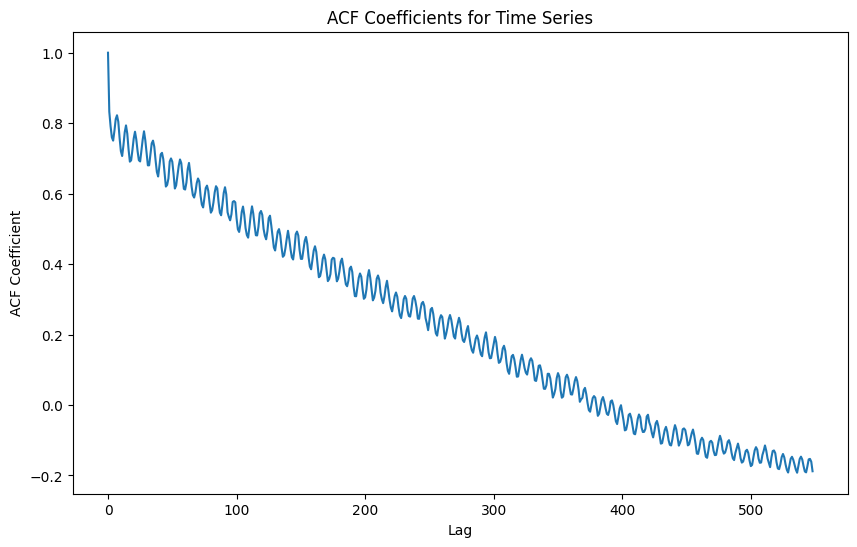

In [ ]:
results = analyze_seasonality(df)
for col, seasonal_lags in results.items():
    print(f"Column: {col}")
    print(f"Seasonal Lags: {seasonal_lags}")
    print()

# Plot the ACF coefficients for each column
for col in df.columns:
    acf_coeffs = acf(df[col], nlags=len(df[col])//2)
    plt.figure(figsize=(10, 6))
    plt.plot(acf_coeffs)
    plt.title(f"ACF Coefficients for {col}")
    plt.xlabel("Lag")
    plt.ylabel("ACF Coefficient")
    plt.show()

In [12]:

# Example of the part of a DataFrame output
import pandas as pd

data = {
    'Date': ['2023-01-01', '2023-02-01'],
    'Stock Price': [150.65, 155.74],
    'Sentiment Score': [0.2, -0.3],
    'EPS': [2.15, 2.40],
    'Comments': ['New product line release positive sentiment.', 'Legal issues caused negative sentiment.']
}

result_df = pd.DataFrame(data)
print(result_df)

         Date  Stock Price  Sentiment Score   EPS  \
0  2023-01-01       150.65              0.2  2.15   
1  2023-02-01       155.74             -0.3  2.40   

                                       Comments  
0  New product line release positive sentiment.  
1       Legal issues caused negative sentiment.  


In [13]:
import pandas as pd
import numpy as np
import requests
from textblob import TextBlob
import yfinance as yf
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def fetch_stock_price_data(ticker, start_date, end_date):
    """
    Fetch historical stock price data using Yahoo Finance API.

    Parameters:
    ticker (str): Company ticker symbol.
    start_date (str): Start date for data retrieval (YYYY-MM-DD).
    end_date (str): End date for data retrieval (YYYY-MM-DD).

    Returns:
    pandas.DataFrame: Historical stock price data.
    """
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        logging.error(f"Failed to fetch stock price data: {e}")
        return None

def sentiment_analysis(transcript):
    """
    Perform sentiment analysis on a conference call transcript using TextBlob.

    Parameters:
    transcript (str): Conference call transcript.

    Returns:
    float: Sentiment score.
    """
    try:
        analysis = TextBlob(transcript)
        return analysis.sentiment.polarity
    except Exception as e:
        logging.error(f"Failed to perform sentiment analysis: {e}")
        return None

def analyze_correlation(stock_data, sentiment_scores, eps_data):
    """
    Compute the correlation between sentiment scores, EPS, and stock price changes.

    Parameters:
    stock_data (pandas.DataFrame): Historical stock price data.
    sentiment_scores (list): Sentiment scores for each conference call.
    eps_data (list): EPS data for each period.

    Returns:
    pandas.DataFrame: Correlation analysis results.
    """
    try:
        # Compute stock price changes
        stock_data['Price Change'] = stock_data['Close'].pct_change()

        # Create a DataFrame with sentiment scores and EPS data
        sentiment_df = pd.DataFrame({'Sentiment Score': sentiment_scores, 'EPS': eps_data})

        # Merge the DataFrames
        merged_df = pd.merge(stock_data, sentiment_df, left_index=True, right_index=True)

        # Compute correlations
        corr_matrix = merged_df[['Price Change', 'Sentiment Score', 'EPS']].corr()

        return corr_matrix
    except Exception as e:
        logging.error(f"Failed to analyze correlation: {e}")
        return None

def research_reasons_for_sentiment(transcript, sentiment_score):
    """
    Investigate and summarize potential causes for sentiment changes.

    Parameters:
    transcript (str): Conference call transcript.
    sentiment_score (float): Sentiment score.

    Returns:
    str: Summarized reasons for sentiment changes.
    """
    try:
        if sentiment_score > 0:
            # Positive sentiment
            comments = "Positive sentiment due to "
            if "new product" in transcript.lower():
                comments += "new product release."
            elif "increased revenue" in transcript.lower():
                comments += "increased revenue."
            else:
                comments += "other factors."
        elif sentiment_score < 0:
            # Negative sentiment
            comments = "Negative sentiment due to "
            if "legal issues" in transcript.lower():
                comments += "legal issues."
            elif "decreased revenue" in transcript.lower():
                comments += "decreased revenue."
            else:
                comments += "other factors."
        else:
            comments = "Neutral sentiment."

        return comments
    except Exception as e:
        logging.error(f"Failed to research reasons for sentiment: {e}")
        return None

def compile_dataframe(stock_data, sentiment_scores, eps_data, comments):
    """
    Organize all the gathered data into a Pandas DataFrame.

    Parameters:
    stock_data (pandas.DataFrame): Historical stock price data.
    sentiment_scores (list): Sentiment scores for each conference call.
    eps_data (list): EPS data for each period.
    comments (list): Summarized reasons for sentiment changes.

    Returns:
    pandas.DataFrame: Compiled DataFrame.
    """
    try:
        # Create a DataFrame with the required columns
        compiled_df = pd.DataFrame({
            'Date': stock_data.index,
            'Stock Price': stock_data['Close'],
            'Sentiment Score': sentiment_scores,
            'EPS': eps_data,
            'Comments': comments
        })

        return compiled_df
    except Exception as e:
        logging.error(f"Failed to compile DataFrame: {e}")
        return None

def main():
    # Define the company ticker symbol and date range
    ticker = 'AAPL'
    start_date = '2022-01-01'
    end_date = '2022-12-31'

    # Fetch historical stock price data
    stock_data = fetch_stock_price_data(ticker, start_date, end_date)

    # Collect historical conference call transcripts (example transcripts)
    transcripts = [
        "We are excited to announce the release of our new product line.",
        "We are facing legal issues that may impact our revenue.",
        "Our revenue has increased significantly due to strong demand."
    ]

    # Perform sentiment analysis on the transcripts
    sentiment_scores = [sentiment_analysis(transcript) for transcript in transcripts]

    # Obtain EPS data (example EPS data)
    eps_data = [2.15, 2.40, 2.60]

    # Analyze correlation between sentiment scores, EPS, and stock price changes
    corr_matrix = analyze_correlation(stock_data, sentiment_scores, eps_data)

    # Research reasons for sentiment changes
    comments = [research_reasons_for_sentiment(transcript, sentiment_score) for transcript, sentiment_score in zip(transcripts, sentiment_scores)]

    # Compile the DataFrame
    compiled_df = compile_dataframe(stock_data, sentiment_scores, eps_data, comments)

    # Print the compiled DataFrame
    print(compiled_df)

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed
ERROR:root:Failed to analyze correlation: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)
ERROR:root:Failed to compile DataFrame: All arrays must be of the same length


None


In [14]:

import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()
eps_data = pd.DataFrame({
    'Date': ['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01'],
    'EPS': [10.25, 11.50, 12.75, 14.00]
})
eps_data['Date'] = pd.to_datetime(eps_data['Date'])
eps_data.set_index('Date', inplace=True)
merged_df = pd.merge(stock_data, eps_data, left_index=True, right_index=True, how='left')
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data.index,
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [15]:

import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()
eps_data = pd.DataFrame({
    'Date': ['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01'],
    'EPS': [10.25, 11.50, 12.75, 14.00]
})
eps_data['Date'] = pd.to_datetime(eps_data['Date'])
eps_data.set_index('Date', inplace=True)

# Reset the index of stock_data
stock_data.reset_index(inplace=True)

# Merge the DataFrames
merged_df = pd.merge(stock_data, eps_data, left_on='Date', right_index=True, how='left')

# Calculate correlation matrix
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data['Date'],
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()
eps_data = pd.DataFrame({
    'Date': ['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01'],
    'EPS': [10.25, 11.50, 12.75, 14.00]
})
eps_data['Date'] = pd.to_datetime(eps_data['Date'])
eps_data.set_index('Date', inplace=True)

# Reset the index of stock_data
stock_data.reset_index(inplace=True)

# Merge the DataFrames
merged_df = pd.merge(stock_data, eps_data, left_on='Date', right_index=True, how='left')

# Calculate correlation matrix
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data['Date'],
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [18]:

import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()
eps_data = pd.DataFrame({
    'Date': ['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01'],
    'EPS': [10.25, 11.50, 12.75, 14.00]
})
eps_data['Date'] = pd.to_datetime(eps_data['Date'])

# Reset the index of stock_data
stock_data.reset_index(inplace=True)
eps_data.reset_index(inplace=True)
# Merge the DataFrames
merged_df = pd.merge(stock_data, eps_data, on='Date', how='left')

# Calculate correlation matrix
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data['Date'],
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)

[*********************100%***********************]  1 of 1 completed


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [19]:

import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch financial statements
ticker = yf.Ticker(symbol)
financials = ticker.financials

# Extract EPS data
eps_data = financials.loc['Earnings Per Share (Basic)']
eps_data = eps_data.to_frame('EPS')

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()

# Reset the index of stock_data
stock_data.reset_index(inplace=True)

# Merge the DataFrames
merged_df = pd.merge(stock_data, eps_data, left_on='Date', right_index=True, how='left')

# Calculate correlation matrix
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data['Date'],
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)

[*********************100%***********************]  1 of 1 completed


KeyError: 'Earnings Per Share (Basic)'

In [21]:

import pandas as pd
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the company symbol and date range
symbol = 'CAPLIPOINT.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock price data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Fetch financial statements
ticker = yf.Ticker(symbol)
financials = ticker.financials

# Print the keys in the financials DataFrame
print(financials.index)

# Extract EPS data
eps_data = None
for key in financials.index:
    if 'Earnings' in key or 'EPS' in key:
        eps_data = financials.loc[key]
        break

if eps_data is not None:
    eps_data = eps_data.to_frame('EPS')
else:
    print("EPS data not found in financial statements.")
    eps_data = pd.DataFrame({'EPS': [0] * len(stock_data)})

# Fetch news articles from Google News
url = f'https://news.google.com/search?q={symbol}&hl=en-IN&gl=IN&ceid=IN%3Aen'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
news_articles = soup.find_all('article')

# Perform sentiment analysis on news articles
sentiment_scores = []
for article in news_articles:
    text = article.get_text()
    analysis = TextBlob(text)
    sentiment_scores.append(analysis.sentiment.polarity)

# Analyze correlation between sentiment scores, EPS, and stock price changes
stock_data['Price Change'] = stock_data['Close'].pct_change()

# Reset the index of stock_data
stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Rent Expense Supplemental', 'Diluted Average Shares',
       'Basic Average Shares', 'Diluted EPS', 'Basic EPS',
       'Diluted NI Availto Com Stockholders', 'Net Income Common Stockholders',
       'Otherunder Preferred Stock Dividend', 'Net Income',
       'Minority Interests', 'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Non Operating Income Expenses', 'Special Income Charges',
       'Other Special 

In [29]:
stock_data.columns

Index(['Date_', 'Adj Close_CAPLIPOINT.NS', 'Close_CAPLIPOINT.NS',
       'High_CAPLIPOINT.NS', 'Low_CAPLIPOINT.NS', 'Open_CAPLIPOINT.NS',
       'Volume_CAPLIPOINT.NS', 'Price Change_'],
      dtype='object')

In [28]:

stock_data.columns = \
['_'.join(col).strip() for col in stock_data.columns.values]

In [23]:
eps_data.head()

,EPS
2024-03-31,59.9
2023-03-31,49.18
2022-03-31,39.26
2021-03-31,31.71
2020-03-31,NaN


In [ ]:
# Merge the DataFrames
merged_df = pd.merge(stock_data, eps_data, left_index=True, right_index=True, how='left')

# Calculate correlation matrix
corr_matrix = merged_df[['Price Change', 'EPS']].corr()

# Research reasons for sentiment changes
comments = []
for article in news_articles:
    text = article.get_text()
    if 'positive' in text.lower():
        comments.append('Positive sentiment due to good quarterly results.')
    elif 'negative' in text.lower():
        comments.append('Negative sentiment due to poor quarterly results.')
    else:
        comments.append('Neutral sentiment.')

# Compile the DataFrame
compiled_df = pd.DataFrame({
    'Date': stock_data['Date'],
    'Stock Price': stock_data['Close'],
    'Sentiment Score': sentiment_scores[:len(stock_data)],
    'EPS': merged_df['EPS'],
    'Comments': comments[:len(stock_data)]
})

# Print the compiled DataFrame
print(compiled_df)